In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ejemplo basico
A modo de ejemplo basico se recreara un triangulo rectangulo.
Para evitar un procesamiento numerico innecesario, se reduce el tamaño de la imagen.

Se utiliza este primer ejemplo, para poder comprender el comportamiento del algoritmo.

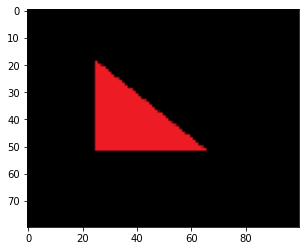

In [2]:
target_img = cv2.imread("Images/image_00.png")
target_img = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGBA)

reduced_img = cv2.resize(target_img, (100, 80)) 
plt.imshow(reduced_img)
plt.show()

Para esto es necesario solo un cromosoma por individuo que tendra el siguiente encoding:

$$\{x_1, y_1, x_2, y_2, x_3, y_3, R, G, B, A\}$$

In [3]:
from src.mainp2 import genetic_algorithm

opciones = {
    "num_poligonos": 1,
    "num_lados": 3,
    "num_individuos": 40,
    "num_generaciones": 400,
    "mutacion": {
        "prob_mutacion": 0.8,
        "cant_mutacion": 0.2
        },
    "cruza": {
        "metodo": "cruce_uniforme"
        },
    "seleccion": {
        "num_seleccion_elite": 5,
        "num_nuevos_individuos": 5,
        "metodo": "elite",
        "K": 20,
    },
    "paso_para_resultados_detallados": 100
}

metricas = genetic_algorithm(reduced_img, opciones)

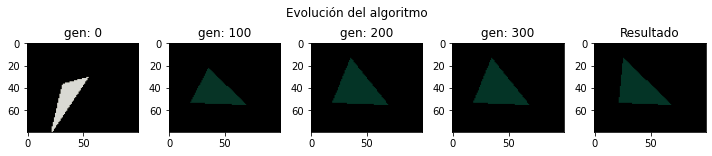

In [4]:
from src.individuo import crear_imagen
mejor_individuo_por_generacion = metricas["mejor_individuo_por_generacion"]

fig, ax = plt.subplots(
    nrows=1,
    ncols=len(mejor_individuo_por_generacion) + 1,
    figsize=(10, 2)
)

i = 0
for ngen, ind in mejor_individuo_por_generacion:
    img = crear_imagen(ind)
    ax[i].imshow(img)
    ax[i].set_title("gen: {}".format(ngen))
    i += 1

img = crear_imagen(metricas["mejor"])
ax[i].imshow(img)
ax[i].set_title("Resultado")

plt.suptitle("Evolución del algoritmo")
plt.tight_layout()
plt.show()

El color no es parecido a la imagen original, eso se debe a que la función fitness prioriza de igual manera las coordenadas x, y, R, G, B, A.
Lo cual como resultado será indistinto el color RGB si el canal A se encuentra muy lejos de ser opaco (255).

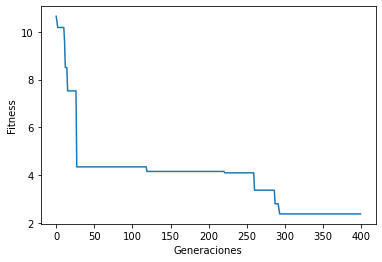

In [9]:
best_score = metricas["mejor_fitness_por_generacion"]
fig, ax1 = plt.subplots()
ax1.plot(best_score)
plt.ylabel("Fitness")
plt.xlabel("Generaciones")
plt.show()

# Variación de parametros

## Selección de padres
Uno de los parametros importantes del algoritmo genetico es el de la diversidad de la población.
Debido a que individuos disimilares permitirán explorar de mejor manera el espacio solución.
Tomando el experimento anterior se variará la cantidad de posibles padres a tomar para el apareamiento y generación de nuevos individuos.

In [26]:
opciones = {
    "num_poligonos": 1,
    "num_lados": 3,
    "num_individuos": 40,
    "num_generaciones": 50,
    "mutacion": {
        "prob_mutacion": 0.0,
        "cant_mutacion": 0.0
        },
    "cruza": {
        "metodo": "cruce_uniforme"
        },
    "seleccion": {
        "num_seleccion_elite": 1,
        "num_nuevos_individuos": 0, 
        "metodo": "elite",
        "K": 0,
    },
    "paso_para_resultados_detallados": 5
}

metricas = []
for k in range(5, 40, 10):
    opciones["seleccion"]["K"] = k
    metrica = genetic_algorithm(reduced_img, opciones)
    metrica["k"] = k
    metricas.append(metrica)

[]

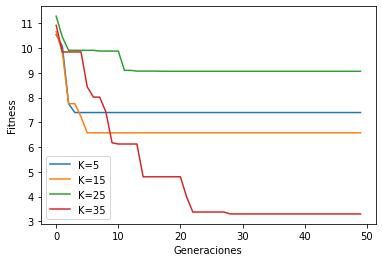

In [27]:
fig, ax1 = plt.subplots()

for metrica in metricas:
    best_score = metrica["mejor_fitness_por_generacion"]
    ax1.plot(best_score)

ax1.legend(["K={}".format(d["k"]) for d in metricas])
plt.ylabel("Fitness")
plt.xlabel("Generaciones")
plt.plot()

Si se eligen pocos padres se observa que el algoritmo queda "atascado" más rápido, por tener muchos individuos de caracteristicas similares. Lo cual el espacio solución explorado queda muy reducido.

## Inyección de nuevos individuos

Para salir del "atascamiento" del algoritmo se pueden inyectar nuevos individuos a la población.
De esta manera es posible tener una mayor variabilidad en la exploración.

In [39]:
opciones = {
    "num_poligonos": 1,
    "num_lados": 3,
    "num_individuos": 40,
    "num_generaciones": 300,
    "mutacion": {
        "prob_mutacion": 0.0,
        "cant_mutacion": 0.0
        },
    "cruza": {
        "metodo": "cruce_uniforme"
        },
    "seleccion": {
        "num_seleccion_elite": 1,
        "num_nuevos_individuos": 0, 
        "metodo": "elite",
        "K": 5,
    },
    "paso_para_resultados_detallados": 5
}

metricas = []
for n_nuevos_ind in range(0, 20, 5):
    opciones["seleccion"]["num_nuevos_individuos"] = n_nuevos_ind
    metrica = genetic_algorithm(reduced_img, opciones)
    metrica["n_nuevos_ind"] = n_nuevos_ind
    metricas.append(metrica)

[]

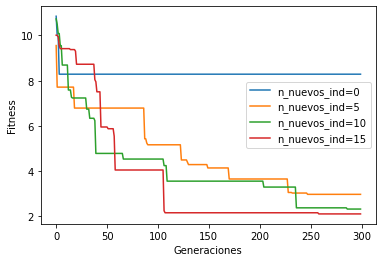

In [40]:
fig, ax1 = plt.subplots()

for metrica in metricas:
    best_score = metrica["mejor_fitness_por_generacion"]
    ax1.plot(best_score)

ax1.legend(["n_nuevos_ind={}".format(d["n_nuevos_ind"]) for d in metricas])
plt.ylabel("Fitness")
plt.xlabel("Generaciones")
plt.plot()

## Mutación
Lo anterior, tambien se puede hacer mutando al hijo obtenido luego del apareamiento de individuos.
Para esto se indica que todos los hijos muten (prob_mutacion = 1.0) pero con diferentes tasas.

In [71]:
opciones = {
    "num_poligonos": 1,
    "num_lados": 3,
    "num_individuos": 40,
    "num_generaciones": 200,
    "mutacion": {
        "prob_mutacion": 1.0,
        "cant_mutacion": 0.0
        },
    "cruza": {
        "metodo": "cruce_uniforme"
        },
    "seleccion": {
        "num_seleccion_elite": 1,
        "num_nuevos_individuos": 0, 
        "metodo": "elite",
        "K": 5,
    },
    "paso_para_resultados_detallados": 5
}

metricas = []
for prob_mutacion in range(0, 10, 2):
    opciones["mutacion"]["cant_mutacion"] = prob_mutacion / 10
    metrica = genetic_algorithm(reduced_img, opciones)
    metrica["cant_mutacion"] = prob_mutacion
    metricas.append(metrica)

[]

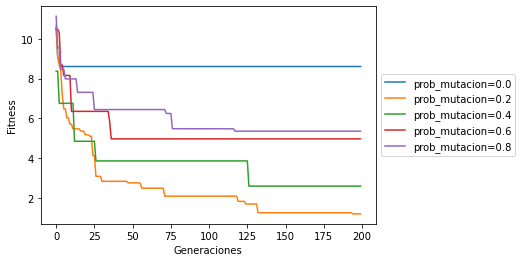

In [72]:
fig, ax1 = plt.subplots()

for metrica in metricas:
    best_score = metrica["mejor_fitness_por_generacion"]
    ax1.plot(best_score)

ax1.legend(
    ["prob_mutacion={}".format(d["cant_mutacion"]/10) for d in metricas],
    bbox_to_anchor=[1., 0.5], loc='center left'
    )
plt.ylabel("Fitness")
plt.xlabel("Generaciones")
plt.plot()

# Metodos de selección

In [12]:
from src.mainp2 import genetic_algorithm
from src.individuo import crear_imagen

selecciones = [
    "random",
    "elite",
    "ruleta",
    "universal",
    "ranking",
    "boltzmann",
    "torneo_deterministico",
    "torneo_probabilistico",
]

opciones = {
    "num_poligonos": 1,
    "num_lados": 3,
    "num_individuos": 40,
    "num_generaciones": 200,
    "mutacion": {
        "prob_mutacion": 0.5,
        "cant_mutacion": 0.2
        },
    "cruza": {
        "metodo": "cruce_uniforme"
        },
    "seleccion": {
        "num_seleccion_elite": 1,
        "num_nuevos_individuos": 0, 
        "metodo": "elite",
        "K": 5,
        "T": 1,
        "dT": 0.05,
        "num_ind_torneo": 5,
        "threshold_torneo": 0.5,
    },
    "paso_para_resultados_detallados": 5
}

metricas = []
for seleccion in selecciones:
    opciones["seleccion"]["metodo"] = seleccion
    metrica = genetic_algorithm(reduced_img, opciones)
    metrica["seleccion"] = seleccion
    metricas.append(metrica)

[]

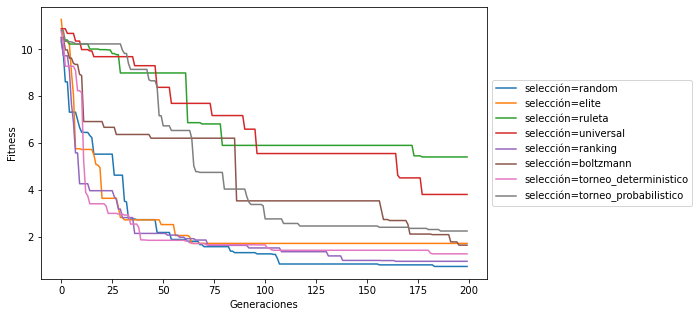

In [16]:
fig, ax1 = plt.subplots(figsize=(8,5))

for metrica in metricas:
    best_score = metrica["mejor_fitness_por_generacion"]
    ax1.plot(best_score)

ax1.legend(
    ["selección={}".format(d["seleccion"]) for d in metricas],
    bbox_to_anchor=[1., 0.5], loc='center left'
    )
plt.ylabel("Fitness")
plt.xlabel("Generaciones")
plt.plot()